<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/17-1-Bosques-Aleatorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Bosques Aleatorios
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; Periodo 2025-02
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado como una guía introductoria para implementar bosques aleatorios en Python. 



Los paquetes necesarios son:

In [1]:
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización
import numpy as np

from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestRegressor,  RandomForestClassifier


---
## <font color='264CC7'> Ejemplo </font>

En el siguiente código, se muestra un ejemplo de cómo implementar el algoritmo de árboles de decisión en Python.

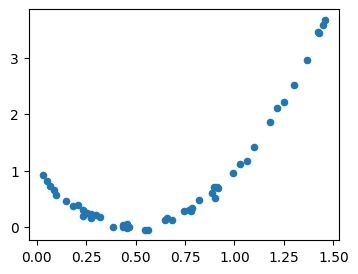

In [2]:
# Generamos los datos
np.random.seed(42)
m = 50
X = 1.5*np.random.rand(m) 
X = np.sort(X)
y = 4*X**2 - 4*X + 1 + 0.05*np.random.randn(m)

X = X.reshape(-1, 1)

# Visualizar los datos
plt.figure(figsize=(4, 3))
plt.scatter(X, y, s=20)
plt.show()


Dividimos los datos en los conjuntos de entrenamiento y prueba.

In [3]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamos el modelo:

In [4]:
# Crear y entrenar un arbol con ganancia de información
modelo = RandomForestRegressor()
modelo.fit(X_train, y_train)

RandomForestRegressor()

Visualicemos el resultado:

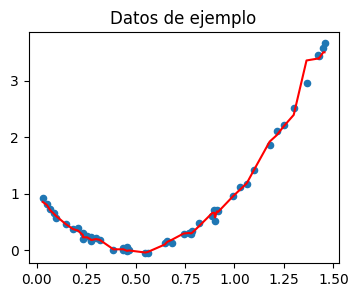

In [5]:
# Realizo las predicciones
y_pred = modelo.predict(X)

# Visualizar los datos
plt.figure(figsize=(4, 3))
plt.scatter(X, y, s=20)
plt.plot(X, y_pred, color='red')
plt.title('Datos de ejemplo')
plt.show()

Revisamos la precisión del modelo:

In [6]:
# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(mean_squared_error(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.02


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Ajusta el hiperparámetro `max_depth` a 3 y analiza el impacto en la precisión.
</div>
</br>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Ajusta el hiperparámetro `n_estimators` a 100 y analiza el impacto en la precisión.
</div>
</br>

---
## <font color='264CC7'> Ejemplo práctico </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero leamos los datos y seleccionemos las columnas que utilizaremos:

In [7]:
# Leer los datos
data = pd.read_csv('https://raw.githubusercontent.com/andres-merino/AprendizajeAutomaticoInicial-05-N0105/refs/heads/main/2-Notebooks/datos/Pokemon.csv')
# Tomo las columnas de interés
numeric_cols = ['Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def', 'HP']
class_col = ['Stage']
data = data[['Name', *numeric_cols, *class_col]]
# Muestro los primeros registros
display(data.head())

,Name,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Stage
0,Bulbasaur,49,49,45,65,65,45,2
1,Ivysaur,62,63,60,80,80,60,1
2,Venusaur,82,83,80,100,100,80,0
3,Charmander,52,43,65,60,50,39,2
4,Charmeleon,64,58,80,80,65,58,1


Revisemos los datos:

In [8]:
data.describe()

,Attack,Defense,Speed,Sp. Atk,Sp. Def,HP,Stage
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,72.549669,68.225166,68.933775,67.139073,66.019868,64.211921,0.569536
std,26.596162,26.916704,26.746880,28.534199,24.197926,28.590117,0.678331
min,5.000000,5.000000,15.000000,15.000000,20.000000,10.000000,0.000000
25%,51.000000,50.000000,46.500000,45.000000,49.000000,45.000000,0.000000
50%,70.000000,65.000000,70.000000,65.000000,65.000000,60.000000,0.000000
75%,90.000000,84.000000,90.000000,87.500000,80.000000,80.000000,1.000000
max,134.000000,180.000000,140.000000,154.000000,125.000000,250.000000,2.000000


Dividimos los datos en los conjuntos de entrenamiento y prueba.

In [9]:
X = data[numeric_cols]

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, data['Stage'], test_size=0.2, random_state=42, stratify=data['Stage'])

### <font color='264CC7'> Modelo </font>

Entrenamos el modelo:

In [10]:
# Crear y entrenar un arbol con ganancia de información
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

RandomForestClassifier()

Revisamos la precisión del modelo:

In [11]:
# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.74
Matriz de confusión:
[[15  2  0]
 [ 3  8  0]
 [ 0  3  0]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.62      0.73      0.67        11
           2       0.00      0.00      0.00         3

    accuracy                           0.74        31
   macro avg       0.48      0.54      0.51        31
weighted avg       0.68      0.74      0.71        31



c:\Users\aemer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aemer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\aemer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,